<a href="https://colab.research.google.com/github/PristRawal/Machine-Learning/blob/master/K_means_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names

In [5]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: iris.target_names[x])

In [7]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


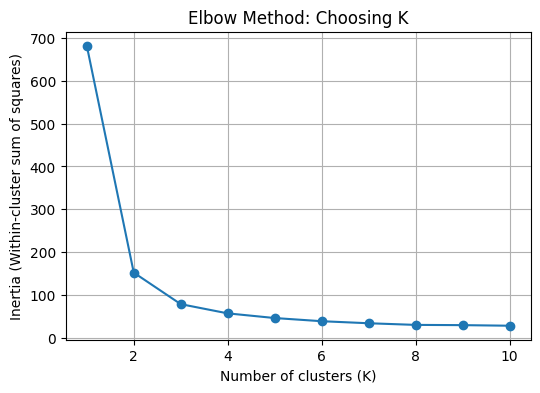

In [8]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot Elbow Curve
plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title("Elbow Method: Choosing K")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia (Within-cluster sum of squares)")
plt.grid(True)
plt.show()

In [ ]:
#Silhoutte method to find value of k without using graph
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris

iris = load_iris()
X = iris.data

silhouette_scores = []
K_range = range(2, 11)  # Start from 2 (silhouette score not defined for k=1)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Find best K (highest silhouette score)
best_k = K_range[silhouette_scores.index(max(silhouette_scores))]
print(" Best K (based on silhouette score):", best_k)


In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
cluster_labels = kmeans.labels_

In [11]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

Text(0, 0.5, 'PCA Component 2')

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


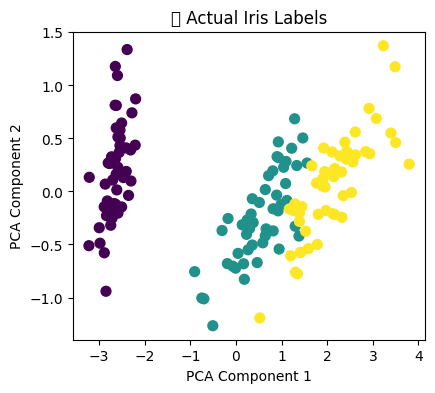

In [12]:
plt.figure(figsize=(10, 4))

# Actual Labels
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', s=50)
plt.title(' Actual Iris Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

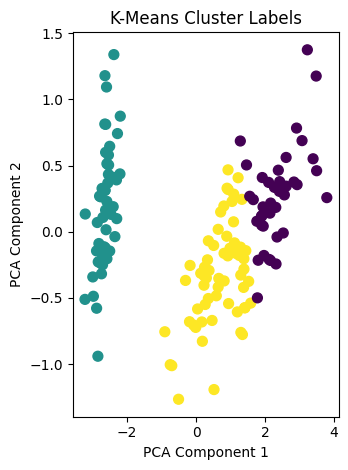

In [14]:
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis', s=50)
plt.title('K-Means Cluster Labels')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')


plt.tight_layout()
plt.show()

Using Seaborn

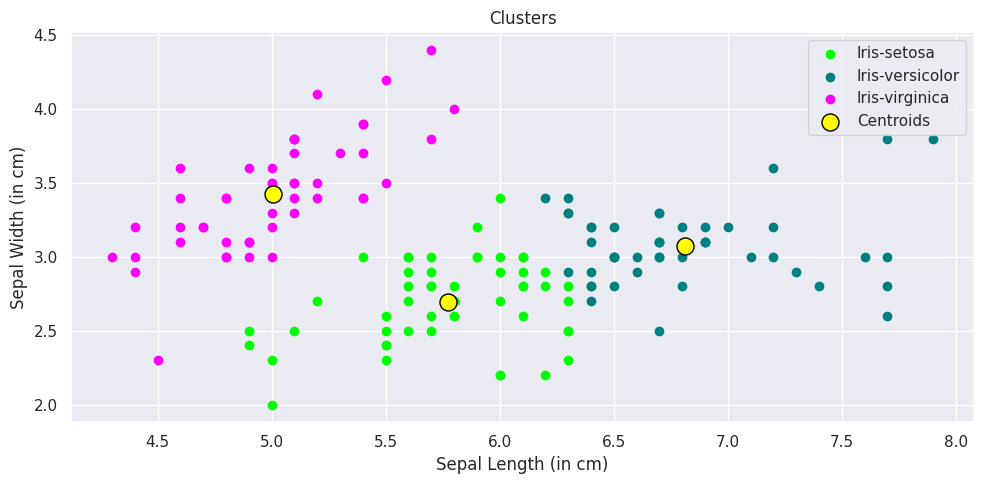

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import pandas as pd

# Load Iris dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
X['target'] = iris.target

# Use only Sepal Length and Sepal Width for 2D plotting
X_plot = X[['sepal length (cm)', 'sepal width (cm)']]

# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
X['cluster'] = kmeans.fit_predict(X_plot)
centroids = kmeans.cluster_centers_

# Map cluster labels to names (manual guess based on typical clustering)
label_map = {0: 'Iris-versicolor', 1: 'Iris-setosa', 2: 'Iris-virginica'}

# You may need to adjust this mapping depending on how KMeans labeled clusters
X['cluster_name'] = X['cluster'].map(label_map)

# Set seaborn style
sns.set(style="darkgrid")

# Plot
plt.figure(figsize=(10, 5))
colors = {'Iris-setosa': 'lime', 'Iris-versicolor': 'teal', 'Iris-virginica': 'magenta'}

for name, group in X.groupby('cluster_name'):
    plt.scatter(group['sepal length (cm)'], group['sepal width (cm)'],
                label=name, color=colors[name])

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1],
            s=150, c='yellow', label='Centroids', edgecolor='black')

# Labels and title
plt.title("Clusters")
plt.xlabel("Sepal Length (in cm)")
plt.ylabel("Sepal Width (in cm)")
plt.legend()
plt.tight_layout()
plt.show()
